In [1]:
import math
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from IPython.display import Audio
import numpy as np
import sympy as s
import sympy.plotting.plot as sympy_plot

https://en.wikipedia.org/wiki/Beat_(acoustics)

https://en.wikipedia.org/wiki/Superposition_principle

## Audio tone frequencies

Sound comes from longitudinal pressure waves of air particles.  Different audio tones have different wave frequencies.  A wave for a single frequency can be described by the following equation.

$y(t) = 
    cos
    \left({
        2 \pi f t
    }\right)
$

Where, $y$ is the hieght of the wave (or volume), $t$ is the time value (seconds), and $f$ = wave frequency (Hertz).

### Example using symboic equations

Let's use the Sympy package to define this equation as a symbolic expression.

In [2]:
# Define variables as Sympy symbols
t, f = s.symbols('t f')

# Define Sympy expressions fy
y = s.cos(2*s.pi*t*f)

y

cos(2*pi*f*t)

Let's use $f_1=256$Hz (Middle-c) for $f_1$, and $f_2=440$Hz (The A note above middle-c).

In [3]:
# Substitue values for f1 and f2 
# in the Sympy expressions
y_at_256_hz = y.subs(f, 256)
y_at_440_hz = y.subs(f, 440)

# Show the new expressions
s.pprint(y_at_256_hz)
s.pprint(y_at_440_hz)

cos(512⋅π⋅t)
cos(880⋅π⋅t)


Let's plot these example frequencies together on a graph.

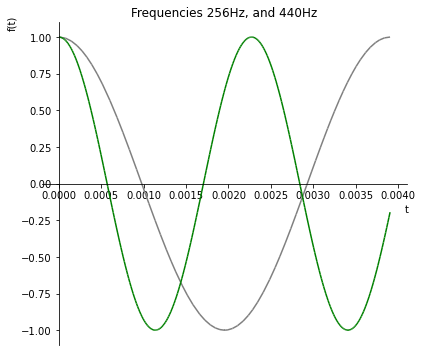

In [32]:
plot_range = (t, 0, 1/256)

p = s.plot(
    y_at_256_hz, plot_range, 
    line_color='gray',
    title=f'Frequencies 256Hz, and 440Hz',
    show=False)
p.extend(s.plot(
    y_at_440_hz, plot_range, 
    line_color='green',
    show=False, adaptive=False))
p.size = (6,5)
p.show()

In order to listen to these two notes we need to create a time series array of values to run through the Audio function.

In [34]:
y1 = s.lambdify(t, y_at_256_hz, "numpy")
y2 = s.lambdify(t, y_at_440_hz, "numpy")

f1, f2 = (256, 440)

# Period of one cycle in seconds
T1, T2 = (1/f1, 1/f2)


n = 50 # Number of samples per cycle
play_time = 3 # Number of seconds of play time

# sampling period micro-seconds
t1_delta = int(1e6*T1/n)
t2_delta = int(1e6*T2/n) 

# total play time in micro-seconds
t_max = int(play_time*1e6)

ts1_range = range(0, t_max, t1_delta)
ts2_range = range(0, t_max, t2_delta)

ts1 = [y1(t/1e6) for t in ts1_range]
ts2 = [y2(t/1e6) for t in ts2_range]

In [35]:
# show the first 5 values of ts1
ts1[0:5]

[1.0,
 0.9921398810025557,
 0.9686830869515307,
 0.9299983642320043,
 0.8766938458918937]

### Play audio tones for middle-C and A

In [7]:
Audio(ts1, rate=256*50)

In [8]:
Audio(ts2, rate=440*50)

## Recreate the US ring tone for phone calls

In the United States, the ring tone for phones has historically been a two second tone composed of the frequencies 400 Hz and 480 Hz. The tone is followed by a four second pause, and then repeated until somebody answers.

Source: https://en.wikipedia.org/wiki/Ringing_tone#North_America,_South_Korea 

When multiple sound waves overlap, their amplitudes add together. This is call superposition.

$y_{super}(t) = 
    cos
    \left({
        2 \pi f_1 t
    }\right)
    +
    cos
    \left({
        2 \pi f_2 t
    }\right)$

Where the beat frequency ($f_{beat}$) is defined as... 

$f_{beat} = \lvert f_1 - f_2 \rvert$.

In [9]:
# Define the two frequencies
f1 = 400
f2 = 440

f_beat = abs(f1-f2)

# Define symbolic equations for the two freq.
# tone, and the funtion for the beat.
y_super = y.subs(f, f1) + y.subs(f, f2)
y_beat = 2*y.subs(f, s.Abs(f1-f2)/2)

s.pprint(y_super)
s.pprint(y_beat)

cos(800⋅π⋅t) + cos(880⋅π⋅t)
2⋅cos(40⋅π⋅t)


Plot the superpositioned frequencies along with the curve for the beat frequency.

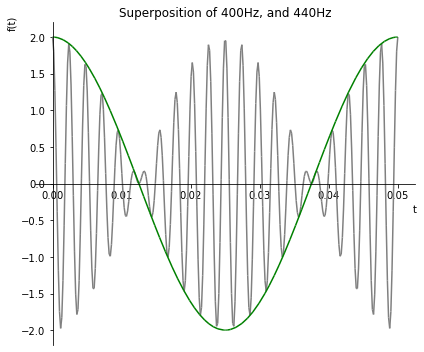

In [28]:
plot_range = (t, 0, 2/f_beat)

# Plot the superpositioned tone function in gray
p = s.plot(
    y_super, plot_range, line_color='gray',
    title=f'Superposition of {f1}Hz, and {f2}Hz',
    show=False, adaptive=False)

# Plot, on the same graph, the beat frequency 
# function in green.
p.extend(
    s.plot(y_beat, plot_range, line_color='green',
           show=False))
p.size = (6,5)
p.show()

Define a Numpy array as a time series of values from the symbolic equation $y_{super}(t)$.  Then we can feed the arry into the Audio function, and listen to it.

In [11]:
# Create a numpy array from y_super
y3 = s.lambdify(t, y_super)

# Period of the maximum frequency
T_max = 1/max(f1,f2)
n = 50 # Number of samples per cycle
play_time = 2 # Number of seconds of play time

# sampling period
t_delta = int(1e6*T_max/n)  # micro-seconds
# total play time
t_max = int(play_time*1e6)  # micro-seconds

# Create the time series as a list
ts3 = [y3(t/1e6) for t in range(0,t_max, t_delta)]
pause_4sec = [0.0 for t in range(0,2*t_max,t_delta)]

In [16]:
audio_sampling_rate = max(f1,f2)*n

print('audio_sampling_rate =', 
      audio_sampling_rate, 'Hz')

audio_sampling_rate = 22000 Hz


In [17]:
Audio(ts3 + pause_4sec + ts3, 
      rate=audio_sampling_rate)